# Exercise 1: directed and switching graphs

In [34]:
# header to start
#%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

import scipy.linalg

import pickle

You are given four examples of sets of four **directed** graphs:
* In the first example, contained in the directory Exercise1_Graph10a, all the graphs contain 10 vertices
* In the second example, contained in the directory Exercise1_Graph10b, all the graphs contain 10 vertices
* In the third example, contained in the directory Exercise1_Graph100a, all the graphs contain 100 vertices
* In the last example, contained in the directory Exercise1_Graph100b, all the graphs contain 100 vertices

The following code can be used to load each graph and compute its Laplacian.

In [35]:
# to load the list of edges from file, you can do the following
with open('Exercise1_Graph10a/graph1.pickle', 'rb') as f:
    E1 = pickle.load(f)

# note that it is possible to find the eigenvalues of a function using the function
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eigvals.html
# np.linalg.eigvals()

# it is possible to sort an array of numbers using
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.sort.html
# np.sort()

# it is possible to find the exponential of a matrix using
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.expm.html#scipy.linalg.expm
# scipy.linalg.expm()

In [36]:
def getLaplacian(E, n_vertices, flag):
    
    A = np.zeros((n_vertices, n_vertices)) # adjancency matrix
    D = np.zeros((n_vertices, n_vertices)) # degree matrix
    laplacian = np.zeros((n_vertices, n_vertices))

    
    if flag == False:
        # calculate the degree matrix for undirected graph
        for each_vertex in range(n_vertices): # For each_vertex we calculate the degree of that vertex
            degree = 0 

            for i in list(range(0, len(E))):
                for j in list(range(0, 2)):
                    if(E[i][j] == each_vertex):
                        degree += 1
            D[each_vertex][each_vertex] = degree
        
        # Calculate the adjancency matrix
        for each_vertex in range(len(E)):
            x, y= E[each_vertex][0], E[each_vertex][1]

            A[x][y] = 1 
            A[y][x] = 1 

        laplacian = np.subtract(D, A)
        return laplacian
        #print("The laplacian for undrirected graph is\n", laplacian)

    if flag == True:
        #Calculate the degree matrix for directed graph
        for each_vertex in range(n_vertices):
            degree_head = 0

            for i in list(range(len(E))):
                if(E[i][1] == each_vertex):
                    degree_head += 1
            D[each_vertex][each_vertex] = degree_head

        #Calculate the Adjancency matrix
        for each_vertex in range(len(E)):
            x = E[each_vertex][0]
            y = E[each_vertex][1]

            A[y][x] = 1
        
        laplacian = np.subtract(D, A)
        return laplacian

E1

[[3, 7], [9, 4], [5, 9], [5, 4], [4, 8], [2, 0], [7, 9]]

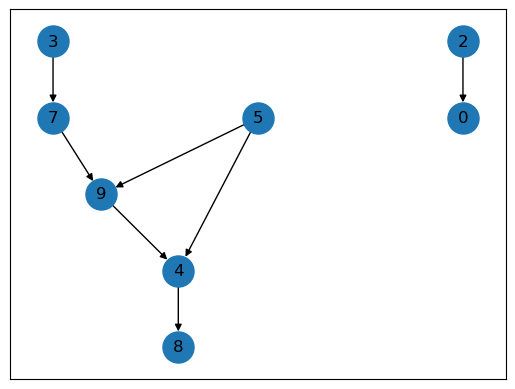

In [37]:
import networkx as nx 
from networkx.drawing.nx_pydot import graphviz_layout 

G1 = nx.DiGraph()
G1.add_edges_from(E1)
pos = graphviz_layout(G1, prog="dot") 
nx.draw_networkx( G1,pos, node_size=500)

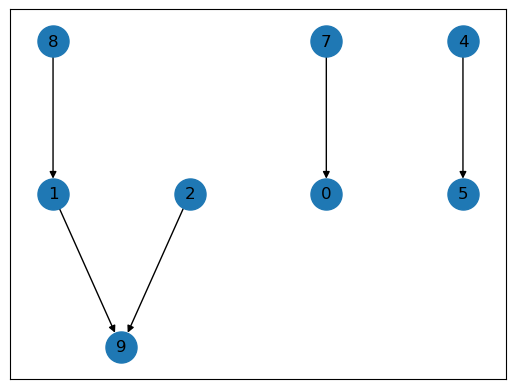

In [38]:
with open('Exercise1_Graph10b/graph1.pickle', 'rb') as f:
    E2 = pickle.load(f)

G2 = nx.DiGraph()
G2.add_edges_from(E2)
pos = graphviz_layout(G2, prog="dot") 
nx.draw_networkx( G2,pos, node_size=500)

In [39]:
with open('Exercise1_Graph100a/graph1.pickle', 'rb') as f:
    E3 = pickle.load(f)

with open('Exercise1_Graph100b/graph1.pickle', 'rb') as f:
    E4 = pickle.load(f)


## Question 2

For each of these graphs, which one contains a rooted-out branching? Why?

- Only graphs whose rank is N-1 (one zero eigenvalue) will contain a rooted-out branch.

In [40]:

with open('Exercise1_Graph10a/graph2.pickle', 'rb') as f:
    E12 = pickle.load(f)
with open('Exercise1_Graph10a/graph3.pickle', 'rb') as f:
    E13 = pickle.load(f)
with open('Exercise1_Graph10a/graph4.pickle', 'rb') as f:
    E14 = pickle.load(f)

print(f"The number of nodes N ({np.array(E1).max()+1}) - rank of the laplacian matrix ({np.linalg.matrix_rank(np.matrix(getLaplacian(E1, np.array(E1).max()+1, True)))}) for the graph 1 10a is {np.array(E1).max()+1 - np.linalg.matrix_rank(np.matrix(getLaplacian(E1, np.array(E1).max()+1, True)))}")
print(f"The number of nodes N ({np.array(E2).max()+1}) - rank of the laplacian matrix ({np.linalg.matrix_rank(np.matrix(getLaplacian(E2, np.array(E2).max()+1, True)))}) for the graph 2 10a is {np.array(E2).max()+1 - np.linalg.matrix_rank(np.matrix(getLaplacian(E2, np.array(E2).max()+1, True)))}")
print(f"The number of nodes N ({np.array(E3).max()+1}) - rank of the laplacian matrix ({np.linalg.matrix_rank(np.matrix(getLaplacian(E3, np.array(E3).max()+1, True)))}) for the graph 3 10a is {np.array(E3).max()+1 - np.linalg.matrix_rank(np.matrix(getLaplacian(E3, np.array(E3).max()+1, True)))}")
print(f"The number of nodes N ({np.array(E4).max()+1}) - rank of the laplacian matrix ({np.linalg.matrix_rank(np.matrix(getLaplacian(E4, np.array(E4).max()+1, True)))}) for the graph 4 10a is {np.array(E4).max()+1 - np.linalg.matrix_rank(np.matrix(getLaplacian(E4, np.array(E4).max()+1, True)))}")




The number of nodes N (10) - rank of the laplacian matrix (5) for the graph 1 10a is 5
The number of nodes N (10) - rank of the laplacian matrix (4) for the graph 2 10a is 6
The number of nodes N (100) - rank of the laplacian matrix (95) for the graph 3 10a is 5
The number of nodes N (100) - rank of the laplacian matrix (45) for the graph 4 10a is 55


Therefore none of 10a include a rooted out branch

In [41]:
with open('Exercise1_Graph10b/graph2.pickle', 'rb') as f:
    E22 = pickle.load(f)
with open('Exercise1_Graph10b/graph3.pickle', 'rb') as f:
    E23 = pickle.load(f)
with open('Exercise1_Graph10b/graph4.pickle', 'rb') as f:
    E24 = pickle.load(f)

print(f"The number of nodes N ({np.array(E2).max()+1}) - rank of the laplacian matrix ({np.linalg.matrix_rank(np.matrix(getLaplacian(E1, np.array(E1).max()+1, True)))}) for the graph 1 10b is {np.array(E1).max()+1 - np.linalg.matrix_rank(np.matrix(getLaplacian(E2, np.array(E2).max()+1, True)))}")
print(f"The number of nodes N ({np.array(E22).max()+1}) - rank of the laplacian matrix ({np.linalg.matrix_rank(np.matrix(getLaplacian(E2, np.array(E2).max()+1, True)))}) for the graph 2 10b is {np.array(E2).max()+1 - np.linalg.matrix_rank(np.matrix(getLaplacian(E22, np.array(E22).max()+1, True)))}")
print(f"The number of nodes N ({np.array(E23).max()+1}) - rank of the laplacian matrix ({np.linalg.matrix_rank(np.matrix(getLaplacian(E3, np.array(E3).max()+1, True)))}) for the graph 3 10b is {np.array(E3).max()+1 - np.linalg.matrix_rank(np.matrix(getLaplacian(E23, np.array(E23).max()+1, True)))}")
print(f"The number of nodes N ({np.array(E24).max()+1}) - rank of the laplacian matrix ({np.linalg.matrix_rank(np.matrix(getLaplacian(E4, np.array(E4).max()+1, True)))}) for the graph 4 10b is {np.array(E4).max()+1 - np.linalg.matrix_rank(np.matrix(getLaplacian(E24, np.array(E24).max()+1, True)))}")

with open('Exercise1_Graph100a/graph2.pickle', 'rb') as f:
    E32 = pickle.load(f)
with open('Exercise1_Graph100a/graph3.pickle', 'rb') as f:
    E33 = pickle.load(f)
with open('Exercise1_Graph100a/graph4.pickle', 'rb') as f:
    E34 = pickle.load(f)

print(f"The number of nodes N ({np.array(E3).max()+1}) - rank of the laplacian matrix ({np.linalg.matrix_rank(np.matrix(getLaplacian(E3, np.array(E3).max()+1, True)))}) for the graph 1 100a is {100 - np.linalg.matrix_rank(np.matrix(getLaplacian(E3, 100, True)))}")
print(f"The number of nodes N ({np.array(E32).max()+1}) - rank of the laplacian matrix ({np.linalg.matrix_rank(np.matrix(getLaplacian(E32, np.array(E32).max()+1, True)))}) for the graph 2 100a is {np.array(E32).max()+1 - np.linalg.matrix_rank(np.matrix(getLaplacian(E32, np.array(E32).max()+1, True)))}")
print(f"The number of nodes N ({np.array(E33).max()+1}) - rank of the laplacian matrix ({np.linalg.matrix_rank(np.matrix(getLaplacian(E33, np.array(E33).max()+1, True)))}) for the graph 3 100a is {np.array(E33).max()+1 - np.linalg.matrix_rank(np.matrix(getLaplacian(E33, np.array(E33).max()+1, True)))}")
print(f"The number of nodes N ({np.array(E34).max()+1}) - rank of the laplacian matrix ({np.linalg.matrix_rank(np.matrix(getLaplacian(E34, np.array(E34).max()+1, True)))}) for the graph 4 100a is {np.array(E34).max()+1 - np.linalg.matrix_rank(np.matrix(getLaplacian(E34, np.array(E34).max()+1, True)))}")

with open('Exercise1_Graph100b/graph2.pickle', 'rb') as f:
    E42 = pickle.load(f)
with open('Exercise1_Graph100b/graph3.pickle', 'rb') as f:
    E43 = pickle.load(f)
with open('Exercise1_Graph100b/graph4.pickle', 'rb') as f:
    E44 = pickle.load(f)

print(f"The number of nodes N ({np.array(E4).max()+1}) - rank of the laplacian matrix ({np.linalg.matrix_rank(np.matrix(getLaplacian(E4, np.array(E4).max()+1, True)))}) for the graph 1 100b is {np.array(E4).max()+1 - np.linalg.matrix_rank(np.matrix(getLaplacian(E4, np.array(E4).max()+1, True)))}")
print(f"The number of nodes N (100) - rank of the laplacian matrix ({np.linalg.matrix_rank(np.matrix(getLaplacian(E42, np.array(E42).max()+1, True)))}) for the graph 2 100b is {100 - np.linalg.matrix_rank(np.matrix(getLaplacian(E42, 100, True)))}")
print(f"The number of nodes N ({np.array(E43).max()+1}) - rank of the laplacian matrix ({np.linalg.matrix_rank(np.matrix(getLaplacian(E43, np.array(E43).max()+1, True)))}) for the graph 3 100b is {np.array(E43).max()+1 - np.linalg.matrix_rank(np.matrix(getLaplacian(E43, np.array(E43).max()+1, True)))}")
print(f"The number of nodes N ({np.array(E44).max()+1}) - rank of the laplacian matrix ({np.linalg.matrix_rank(np.matrix(getLaplacian(E44, np.array(E44).max()+1, True)))}) for the graph 4 100b is {np.array(E44).max()+1 - np.linalg.matrix_rank(np.matrix(getLaplacian(E44, np.array(E44).max()+1, True)))}")

The number of nodes N (10) - rank of the laplacian matrix (5) for the graph 1 10b is 6
The number of nodes N (10) - rank of the laplacian matrix (4) for the graph 2 10b is 5
The number of nodes N (10) - rank of the laplacian matrix (95) for the graph 3 10b is 97
The number of nodes N (10) - rank of the laplacian matrix (45) for the graph 4 10b is 97
The number of nodes N (100) - rank of the laplacian matrix (95) for the graph 1 100a is 5
The number of nodes N (100) - rank of the laplacian matrix (90) for the graph 2 100a is 10
The number of nodes N (100) - rank of the laplacian matrix (93) for the graph 3 100a is 7
The number of nodes N (100) - rank of the laplacian matrix (77) for the graph 4 100a is 23
The number of nodes N (100) - rank of the laplacian matrix (45) for the graph 1 100b is 55
The number of nodes N (100) - rank of the laplacian matrix (46) for the graph 2 100b is 54
The number of nodes N (100) - rank of the laplacian matrix (36) for the graph 3 100b is 64
The number of

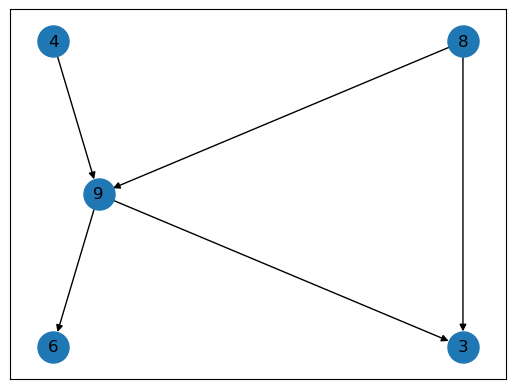

In [42]:
G1 = nx.DiGraph()
G1.add_edges_from(E24)
pos = graphviz_layout(G1, prog="dot") 
nx.draw_networkx( G1,pos, node_size=500)

## Question 3

Assume that for each of the four examples, we implement the consensus protocol where the graphs are switching amoung the four possible graphs, one after the other (after graph 6 we switch back to graph 1). Which of these examples will lead to a converging consensus protocol? Why?



[[1 0 0 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 0]
 [0 0 0 2 0 0 0 0 0 0]
 [0 0 0 0 2 0 0 0 0 0]
 [0 0 0 0 0 2 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 3 0 0]
 [0 0 0 0 0 0 0 0 2 0]
 [0 0 0 0 0 0 0 0 0 4]]
[[0 1 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 1 0 0 1 0]
 [1 0 0 1 0 0 0 1 0 0]
 [0 0 0 0 1 1 0 0 1 0]
 [0 0 0 0 0 0 1 1 0 0]
 [0 0 0 1 0 0 1 0 0 0]
 [0 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]]
[]
No 0 left eigenvalue when adding all edges


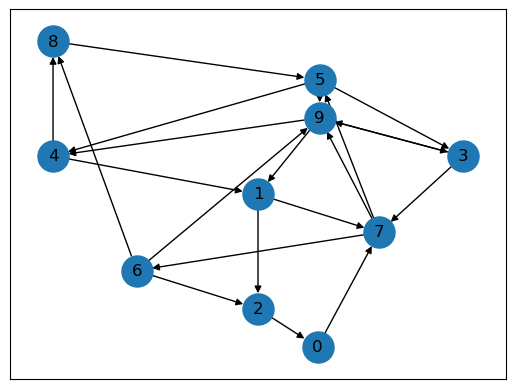

In [43]:
G1 = nx.DiGraph()
G1.add_edges_from(E14)
G1.add_edges_from(E23)
G1.add_edges_from(E12)
G1.add_edges_from(E1)
pos = graphviz_layout(G1, prog="dot") 
nx.draw_networkx( G1,pos, node_size=500)

G1.degree
degrees = [val for (node, val) in sorted(G1.in_degree(), key=lambda pair: pair[0])]

print(np.diag(degrees))
print(nx.adjacency_matrix(G1).toarray())
w,v=scipy.linalg.eig(nx.laplacian_matrix(G1).toarray(),left=True, right=False)
res = np.where(w == 0)[0]
print(res)
print("No 0 left eigenvalue when adding all edges")
#print(nx.laplacian_matrix(G1))

[9]
1 single left eigenvalue when adding all edges


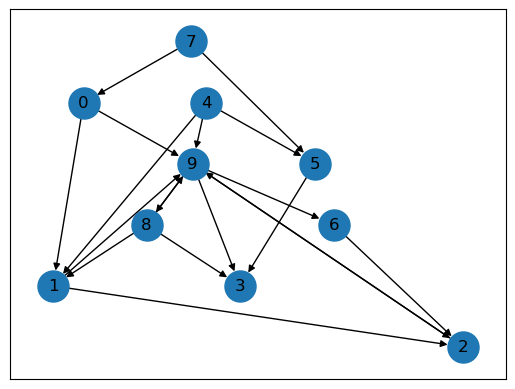

In [44]:
G1 = nx.DiGraph()
G1.add_edges_from(E24)
G1.add_edges_from(E23)
G1.add_edges_from(E22)
G1.add_edges_from(E2)
pos = graphviz_layout(G1, prog="dot") 
nx.draw_networkx( G1,pos, node_size=500)
w,v=scipy.linalg.eig(nx.laplacian_matrix(G1).toarray(),left=True, right=False)
res = np.where(w == 0)[0]
print(res)
print("1 single left eigenvalue when adding all edges")


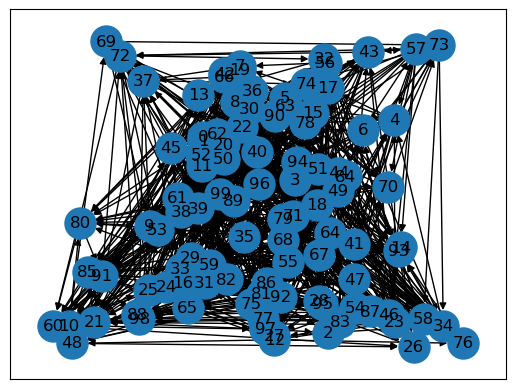

In [45]:
G1 = nx.DiGraph()
G1.add_edges_from(E34)
G1.add_edges_from(E33)
G1.add_edges_from(E32)
G1.add_edges_from(E3)
pos = graphviz_layout(G1, prog="dot")
nx.draw_networkx( G1,pos, node_size=500)




In [46]:
nx.laplacian_matrix(G1).toarray()

w,v=scipy.linalg.eig(nx.laplacian_matrix(G1).toarray(),left=True, right=False)
res = np.where(w == 0)[0]
print(res)
print("No 0 left eigenvalue when adding all edges")

[]
No 0 left eigenvalue when adding all edges


In [47]:
G1 = nx.DiGraph()
G1.add_edges_from(E44)
G1.add_edges_from(E43)
G1.add_edges_from(E42)
G1.add_edges_from(E4)
pos = graphviz_layout(G1, prog="dot")

w,v=scipy.linalg.eig(nx.laplacian_matrix(G1).toarray(),left=True, right=False)
res = np.where(w == 0)[0]
print(res)
print("multiple 0 left eigenvalue when adding all edges, so it does not converge")

[94 95 96 97 98 99]
multiple 0 left eigenvalue when adding all edges, so it does not converge


## Question 4

Simulate the consensus protocol for the four switching graphs examples and verify your answer to the previous question (use random initial conditions uniformly distributed between -10 and 10). Assume that the graphs are switching every 0.1 seconds in a first case and every 1 seconds in the second case. Plot the state of every vertex as a function of time in a graph (one graph per example). How is the convergence speed influenced by switching time?

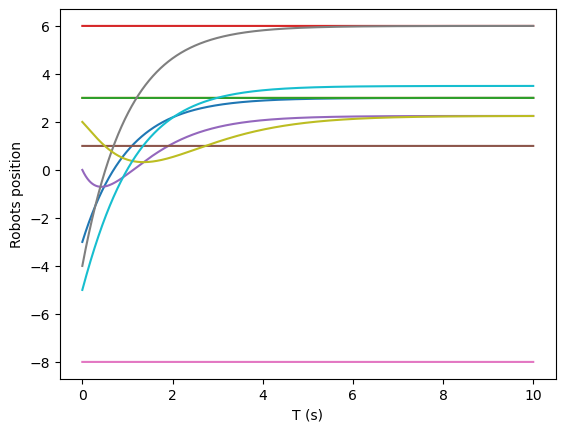

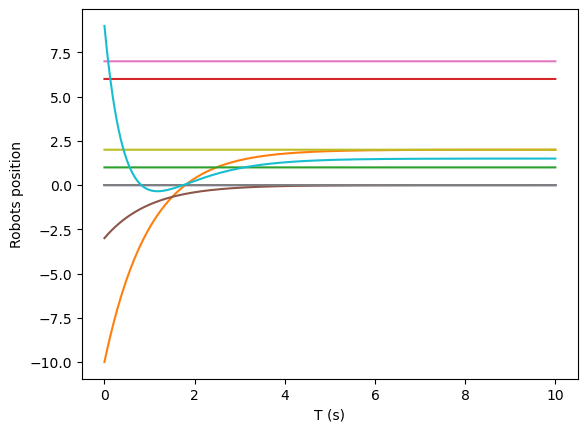

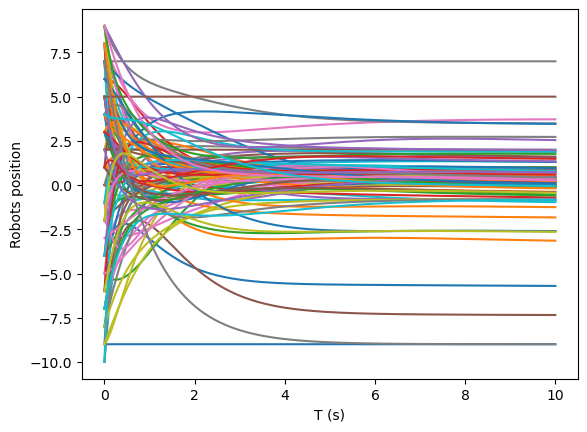

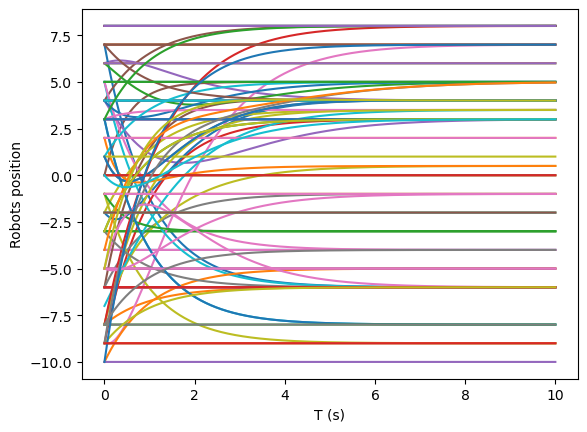

In [48]:
def simConsensus (x_0, T, L, dt=0.001):
    time_arr = np.arange(0,T,dt)
    
    # initialize x
    x = np.zeros((len(x_0),len(time_arr)))
    x[:,0] = x_0     # So that its the first one
   
    for i in range(0,len(time_arr)-1) :
        x[:,i+1] = (np.matmul((-1)*L,x[:,i]))*dt + x[:,i] # Multiply -Lx + the old value to get the new value
        
    for j in range(0,len(x_0)):
        plt.plot(time_arr,x[j,:])    

    plt.ylabel('Robots position')
    plt.xlabel('T (s)')
    plt.show()

L=getLaplacian(E1, np.array(E1).max()+1, True)
nodeAmount=np.array(np.array(E1).max()+1)
simConsensus(np.random.randint(-10, 10, size=nodeAmount), 10, L, 0.001)


L=getLaplacian(E2, np.array(E2).max()+1, True)
nodeAmount=np.array(np.array(E2).max()+1)
simConsensus(np.random.randint(-10, 10, size=nodeAmount), 10, L, 0.001)

L=getLaplacian(E3, np.array(E3).max()+1, True)
nodeAmount=np.array(np.array(E3).max()+1)
simConsensus(np.random.randint(-10, 10, size=nodeAmount), 10, L, 0.001)

L=getLaplacian(E4, np.array(E4).max()+1, True)
nodeAmount=np.array(np.array(E4).max()+1)
simConsensus(np.random.randint(-10, 10, size=nodeAmount), 10, L, 0.001)

## Excercise 2

In [49]:
p=np.transpose(np.array([0.82,1.25,1.695,0.98,1.5,0,0,0]))


![WhatsApp Image 2025-03-21 at 19.33.30_e95db2d5.jpg](<attachment:WhatsApp Image 2025-03-21 at 19.33.30_e95db2d5.jpg>)

![WhatsApp Image 2025-03-21 at 19.33.56_6ef6c512.jpg](<attachment:WhatsApp Image 2025-03-21 at 19.33.56_6ef6c512.jpg>)

![WhatsApp Image 2025-03-21 at 19.34.35_013eef51.jpg](<attachment:WhatsApp Image 2025-03-21 at 19.34.35_013eef51.jpg>)
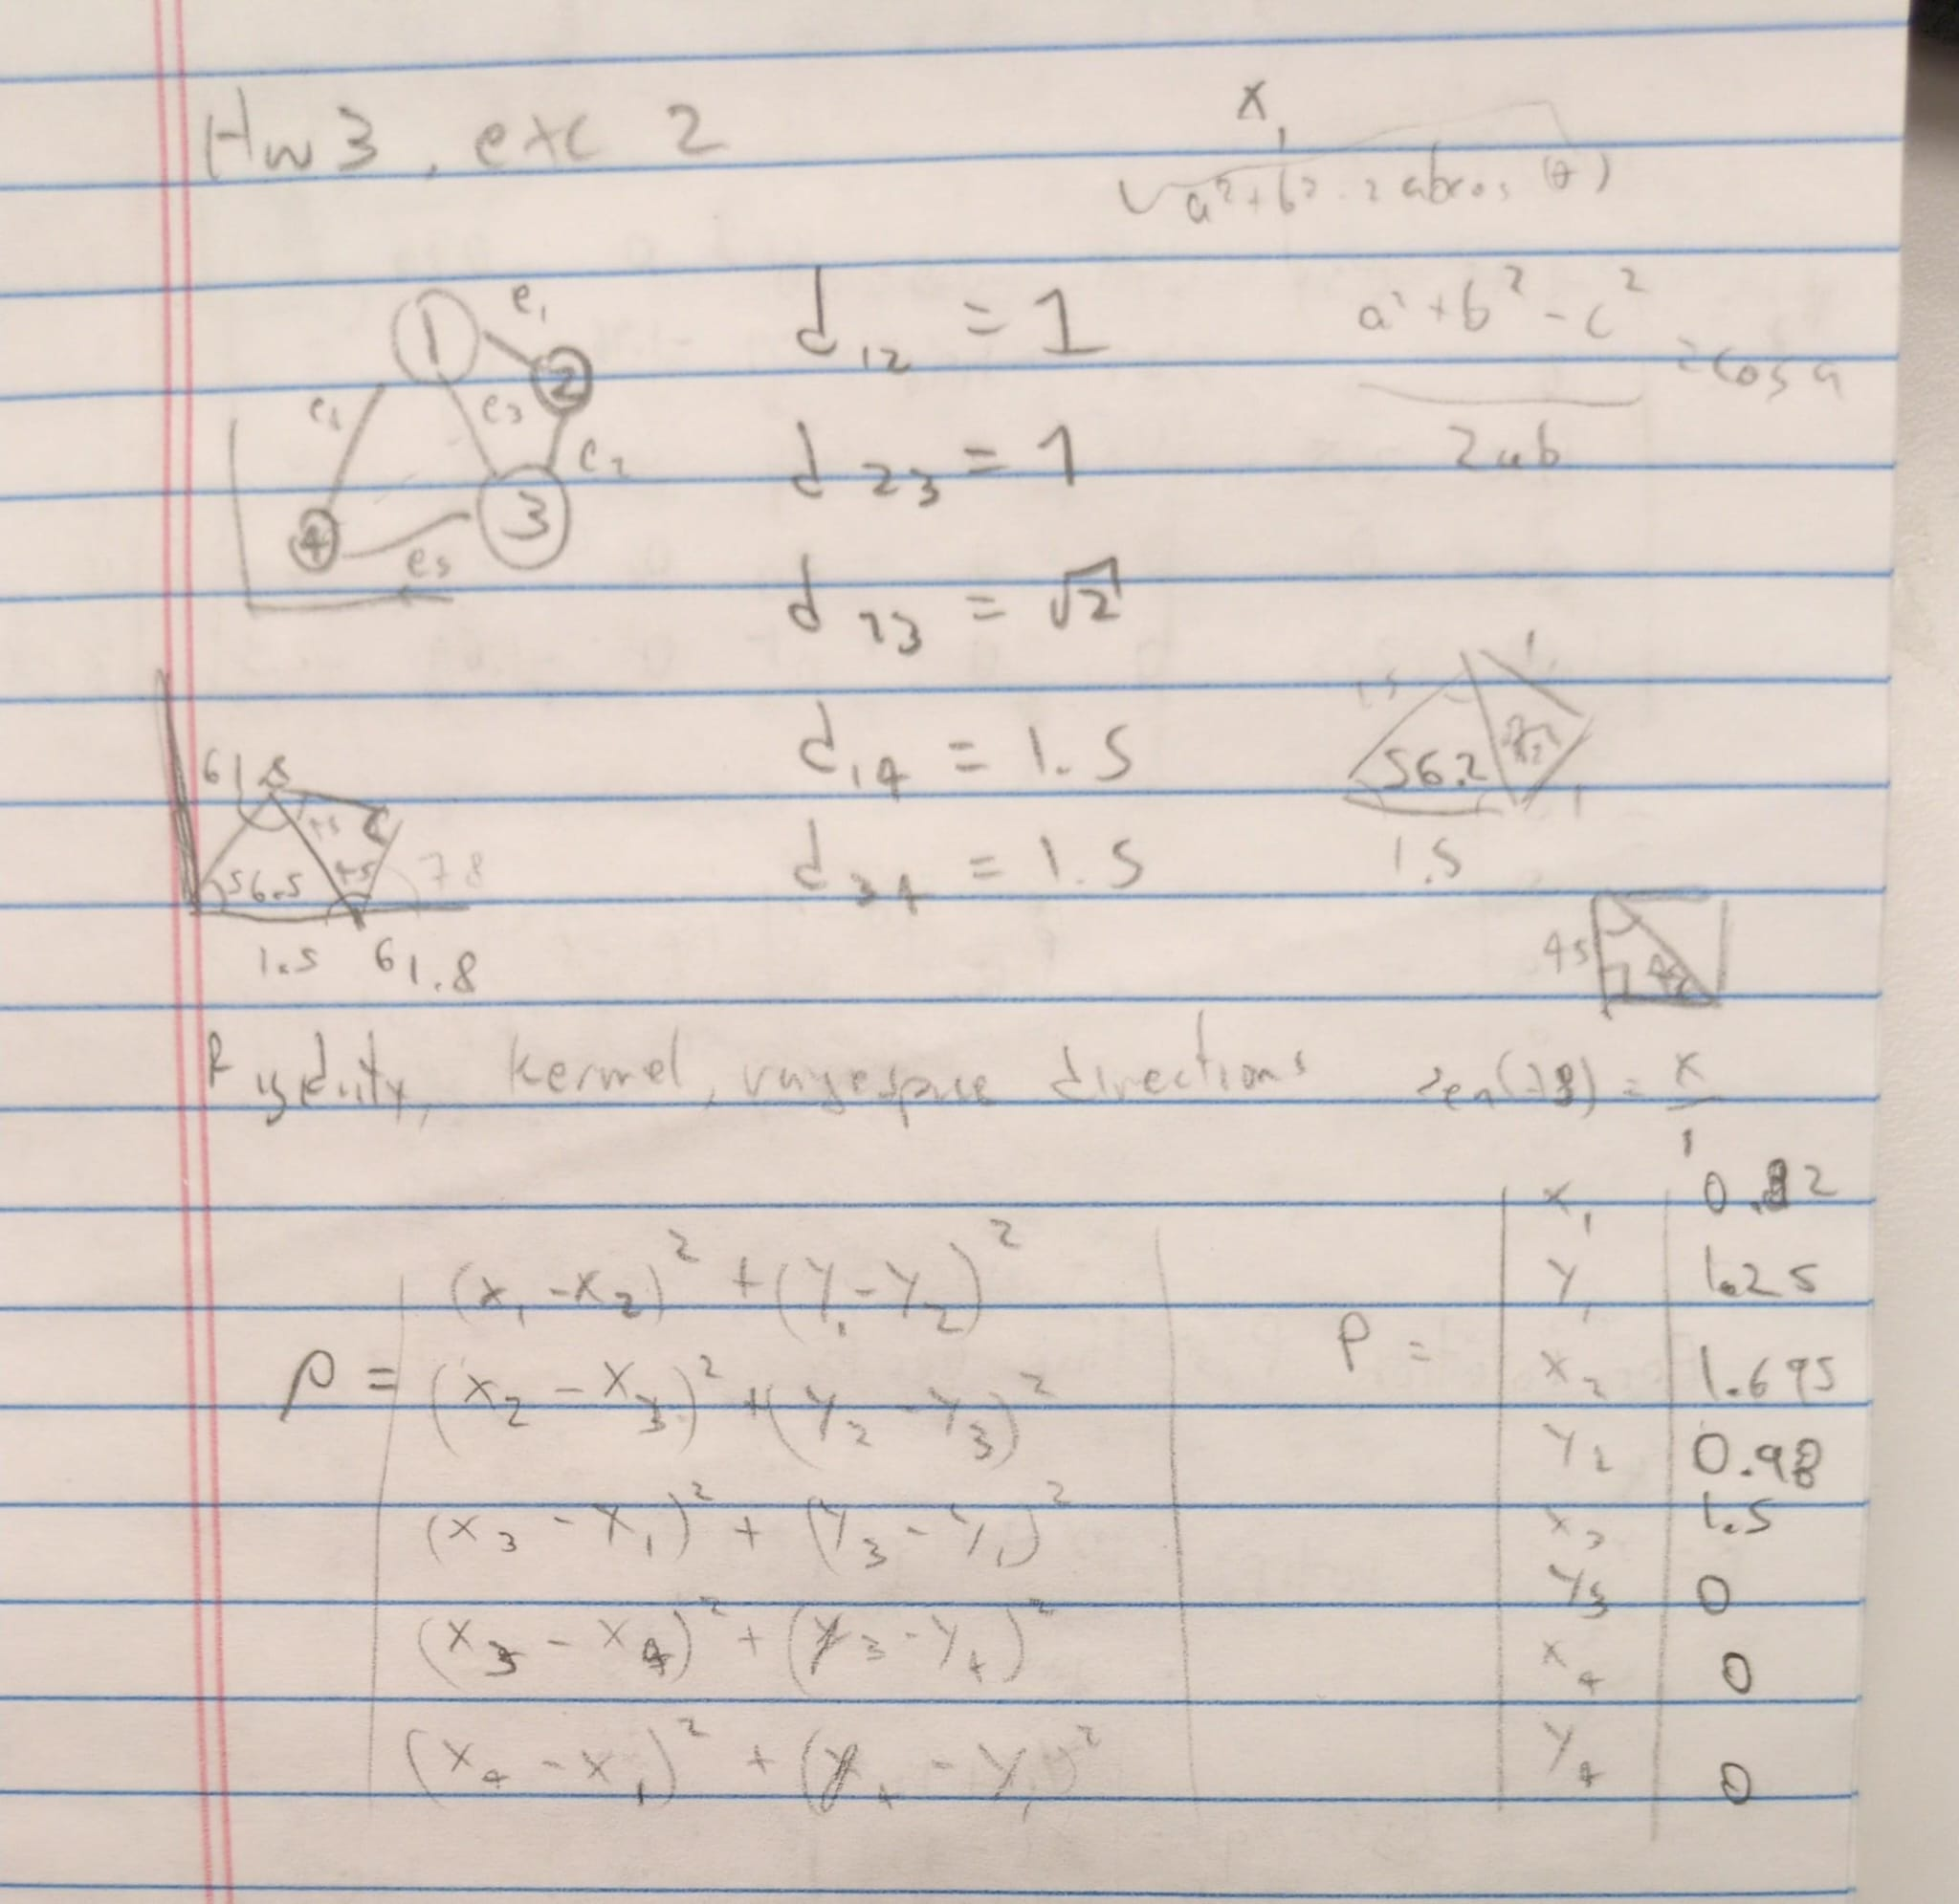
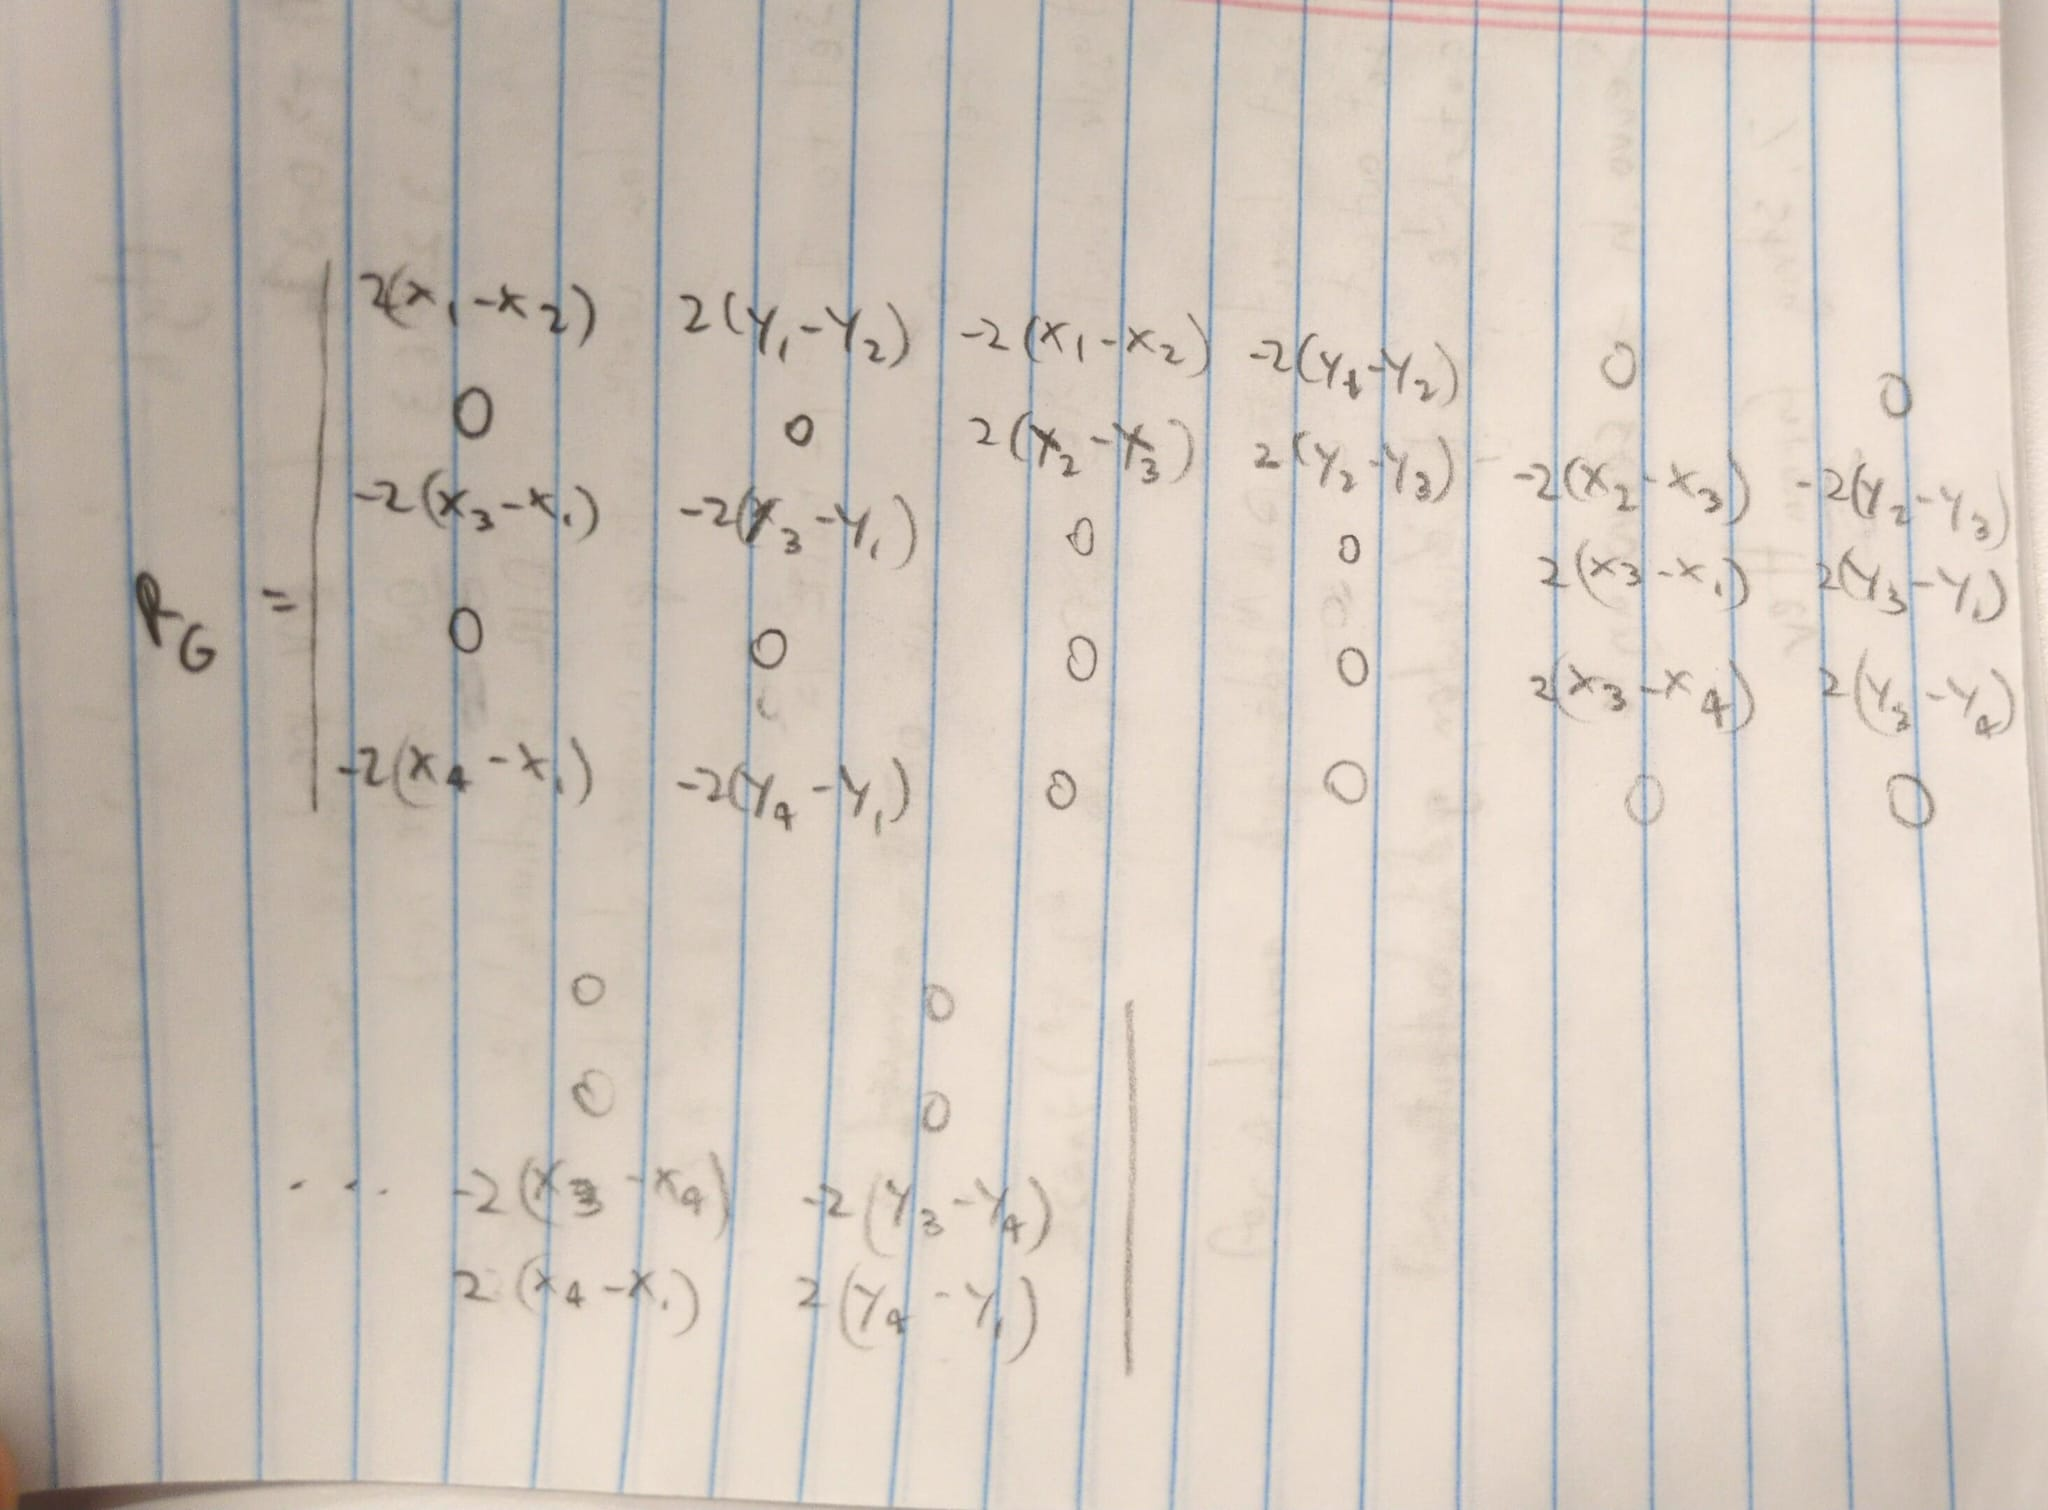
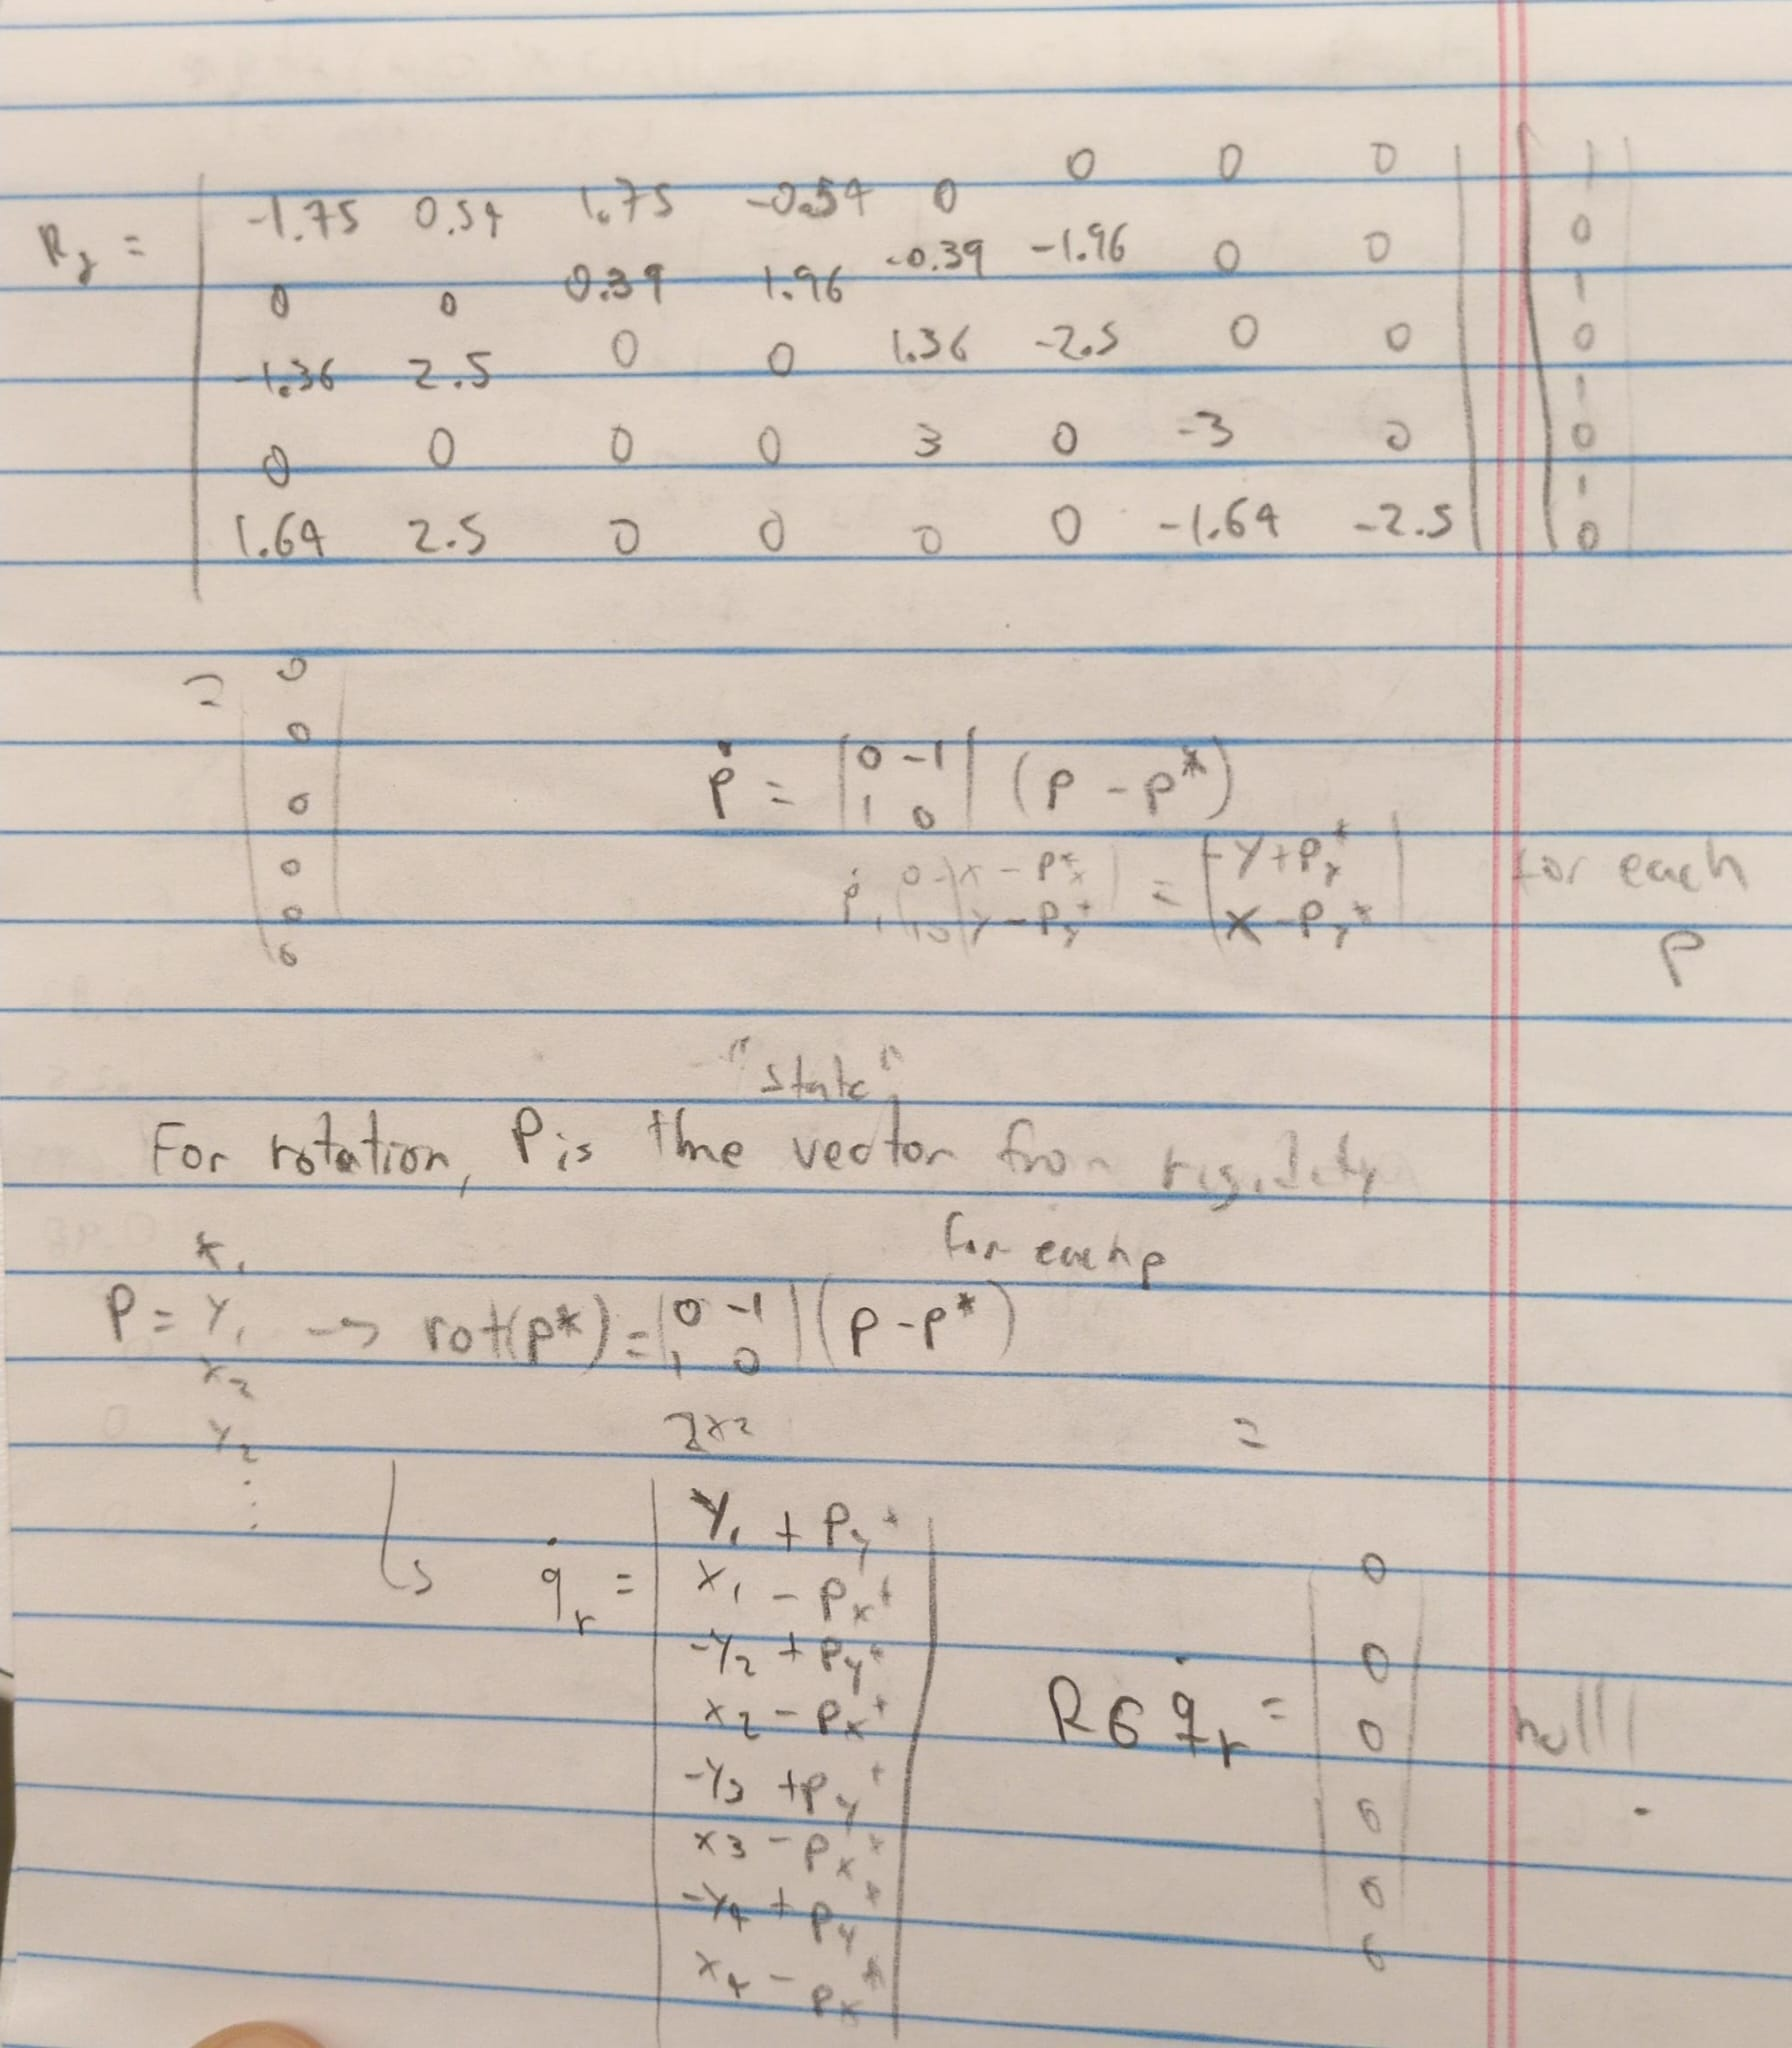

In [50]:
rigidityMat=np.array([[-1.75,0.54,1.75,-0.54,0,0,0,0],[0,0,0.39,1.96,-0.39,-1.96,0,0],[-1.36,2.5,0,0,1.36,-2.5,0,0],[0,0,0,0,3,0,-3,0],[1.64,2.5,0,0,0,0,-1.64,-2.5]])

kernel=scipy.linalg.null_space(rigidityMat)
print("The kernel of the rigidity matrix is\n", kernel)
np.linalg.matrix_rank(rigidityMat)


incidenceMatrix=np.array([[-1,0,1,0,-1],[1,-1,0,0,0],[0,1,-1,1,0],[0,0,0,-1,0],[0,0,0,0,1]])

The kernel of the rigidity matrix is
 [[-0.12985138  0.42923837  0.45429123]
 [ 0.42067899 -0.07257568  0.28080271]
 [-0.0704353   0.45321907  0.31345374]
 [ 0.61323109  0.00513955 -0.17561509]
 [ 0.14522305  0.54026013 -0.19773419]
 [ 0.57031948 -0.01217984 -0.07389912]
 [ 0.14522305  0.54026013 -0.19773419]
 [ 0.24023017 -0.14540596  0.70853138]]
